# Term Frequency


---

Term  & nGram frequency analysis are natural language processing (NLP)  technique used to extract insights from textual data. The basic idea behind term frequency analysis is simple: the more often a word or phrase appears in a text, the more important it is likely to be. By counting the frequency of each word or phrase in the text, we can build a list of the most common terms and gain insights into the topics and themes that are most prevalent in the text.

Our basic recipe:

1. import the data containing text
2. parse the text into words
  - convert words to lower case
  - remove punctuation
  - remove stopwords and other excludes
3. count up the words
  - display top n words
  - make a barchart
  - make a wordcloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


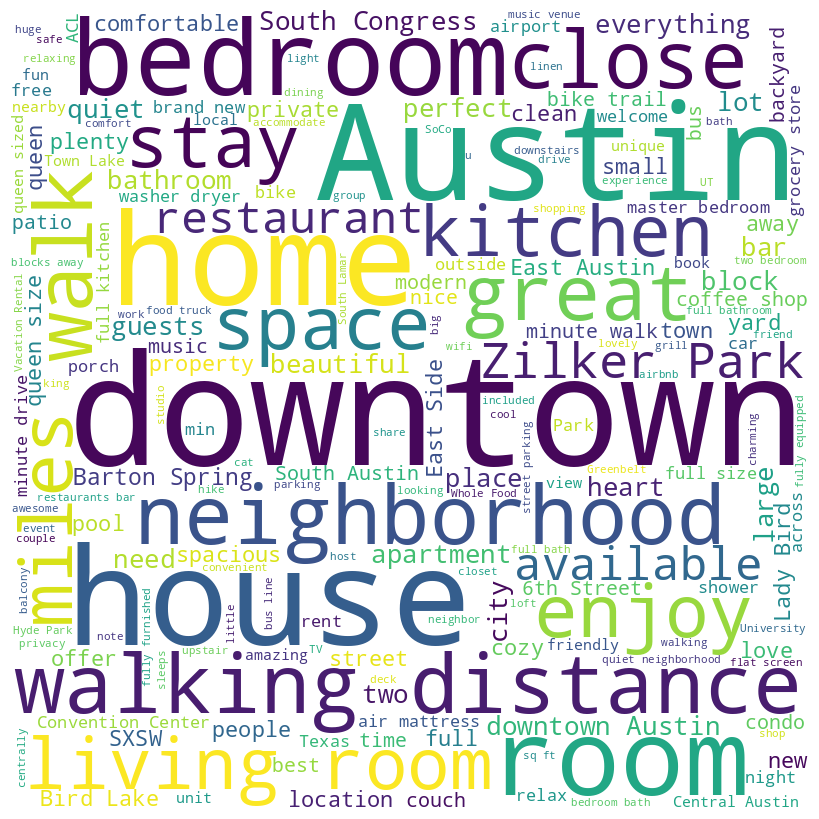

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# standard libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# text libraries
import nltk
from nltk.util import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string
from textblob import TextBlob
from wordcloud import WordCloud

from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')

# Read the data
df = pd.read_csv('/content/airbnb_listings_austin.csv')
# Select multiple columns
columns = ['summary', 'experiences_offered', 'neighborhood_overview', 'space', 'notes']
text = ' '.join(df[columns].astype(str).apply(lambda x: ' '.join(x), axis=1))

# Define words to exclude
exclude_words = {"nan", "none", "rt", "iphone", "amp", "android", "it's", " ", "_", "-", "want", "one", "well", "make",
                 "amenities", "include", "see", "sleep", "open", "check", "may", "take", "feel", "dog", "near", "ton",
                 "etc", "many", "day", "bed", "easy", "use", "mile", "go", "listing", "feel", "includes", "front", "Please", "live", "minutes",
                 "access", "area", "keep", "door", "come", "back", "even", "much", "sq ft", "less", "guest", "will",
                 "within", "feature", "stop", "located", "around", "w", "right", "provide", "next", "features", "s",
                 "including", "three", "tons", "corner", "find", "provided", "notes", "extra", "know", "thing", "plus", "spot", "built"}
stopwords = set(STOPWORDS)
stopwords.update(exclude_words)

# Create the word cloud with stopwords
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [ ]:
import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Make sure to download these before running the script
nltk.download('punkt')
nltk.download('stopwords')

# Read your data
df = pd.read_csv('/content/airbnb_listings_austin.csv')

# Select relevant columns and concatenate the text
columns = ['summary', 'experiences_offered', 'neighborhood_overview', 'space', 'notes']
text = ' '.join(df[columns].astype(str).apply(lambda x: ' '.join(x), axis=1))

# Tokenize and filter out stopwords and punctuation
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Generate bigrams
bigrams = list(ngrams(filtered_words, 2))

# Count and display the most common bigrams
bigram_counts = Counter(bigrams)
most_common_bigrams = bigram_counts.most_common(30)
print(most_common_bigrams)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(('nan', 'nan'), 2738), (('none', 'nan'), 2263), (('walking', 'distance'), 2094), (('zilker', 'park'), 1480), (('living', 'room'), 1464), (('south', 'congress'), 1297), (('downtown', 'austin'), 1288), (('barton', 'springs'), 985), (('queen', 'bed'), 837), (('east', 'austin'), 823), (('within', 'walking'), 771), (('minutes', 'downtown'), 734), (('lady', 'bird'), 710), (('bird', 'lake'), 681), (('size', 'bed'), 671), (('easy', 'access'), 670), (('east', 'side'), 664), (('miles', 'downtown'), 644), (('queen', 'size'), 598), (('south', 'austin'), 581), (('restaurants', 'bars'), 578), (('minute', 'walk'), 575), (('convention', 'center'), 527), (('air', 'mattress'), 519), (('master', 'bedroom'), 517), (('hike', 'bike'), 509), (('full', 'kitchen'), 509), (('coffee', 'shops'), 483), (('bars', 'restaurants'), 475), (('brand', 'new'), 464)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


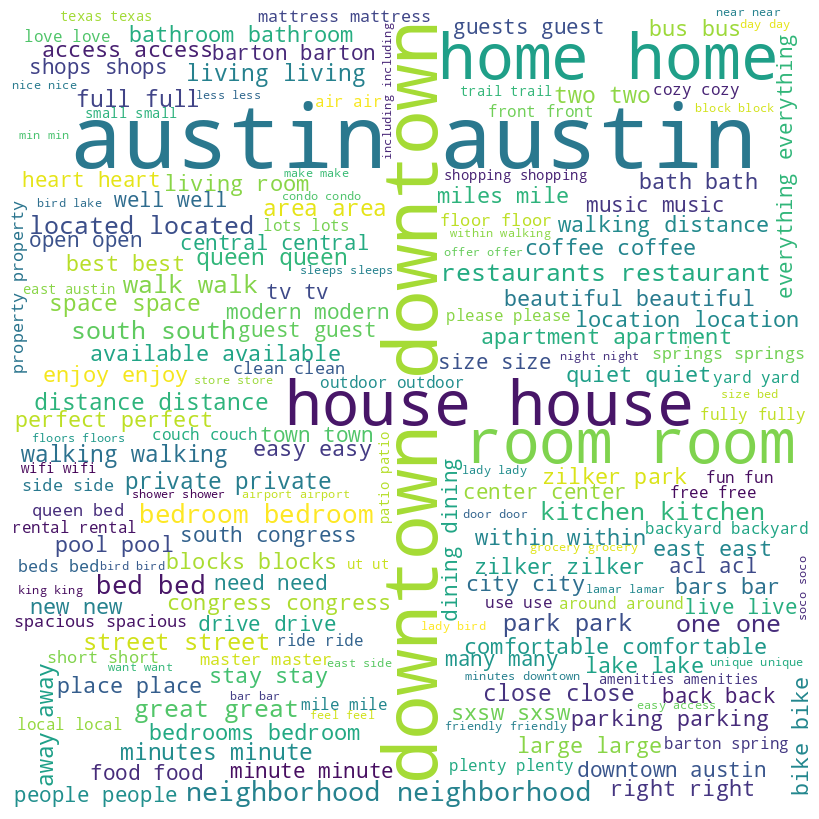

In [ ]:
import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Make sure to download these before running the script
nltk.download('punkt')
nltk.download('stopwords')

# Read your data
df = pd.read_csv('/content/airbnb_listings_austin.csv')

# Select relevant columns and concatenate the text
columns = ['summary', 'experiences_offered', 'neighborhood_overview', 'space', 'notes']
text = ' '.join(df[columns].astype(str).apply(lambda x: ' '.join(x), axis=1))

# Define words to exclude
exclude_words = set(["nan", "none"]

# Tokenize and filter out stopwords and punctuation
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())
filtered_words = [word for word in words if word.isalpha() and word not in stop_words and word not in exclude_words]

# Generate bigrams
bigrams = list(ngrams(filtered_words, 2))

# Convert bigrams to a format suitable for WordCloud
bigram_strings = [' '.join(bigram) for bigram in bigrams]
bigram_text = ' '.join(bigram_strings)

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(bigram_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


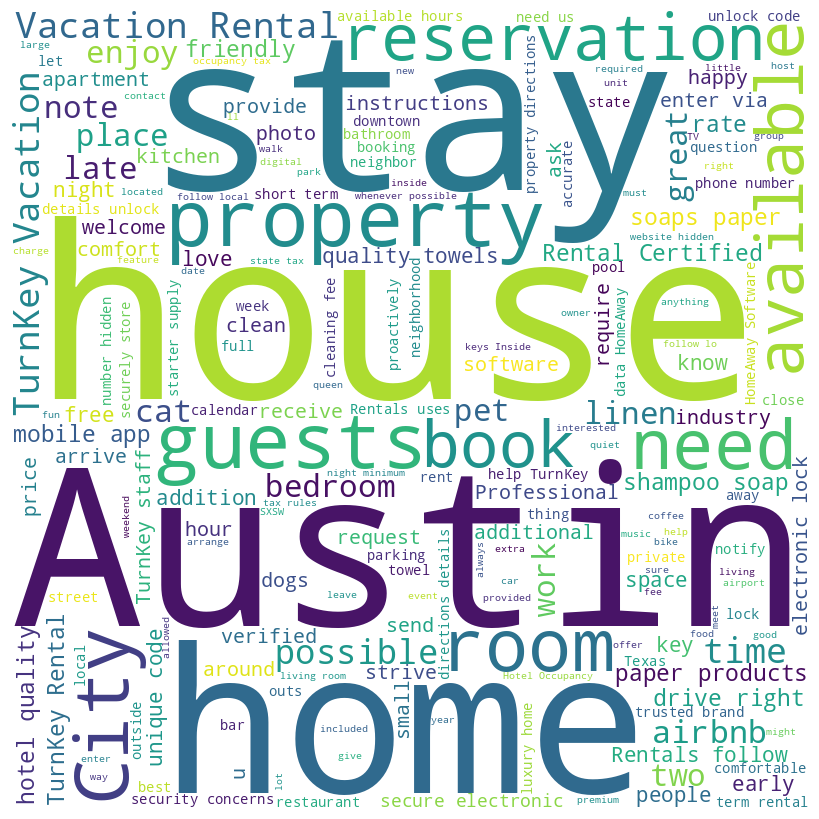

In [ ]:
columns = ['experiences_offered', "notes"]
text = ' '.join(df[columns].astype(str).apply(lambda x: ' '.join(x), axis=1))

# Define words to exclude
exclude_words = {"nan", "none", "rt", "iphone", "amp", "android", "it's", " ", "_", "-", "want", "one", "well", "make",
                 "amenities", "include", "see", "sleep", "open", "check", "may", "take", "feel", "dog", "near", "ton",
                 "etc", "many", "day", "bed", "easy", "use", "mile", "go", "listing", "feel", "includes", "front", "Please", "live", "minutes",
                 "access", "area", "keep", "door", "come", "back", "even", "much", "sq ft", "less", "guest", "will", "everything"}
stopwords = set(STOPWORDS)
stopwords.update(exclude_words)

# Create the word cloud with stopwords
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [ ]:
df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'city', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'in

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# standard libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# text libraries
import nltk
from nltk.util import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string
from textblob import TextBlob
from wordcloud import WordCloud


# Super Basic WordCloud


---

Let's crearte a basic WordCloud

- width=800 and height=400 set the size of the word cloud image.
- max_words=100 tells the WordCloud object to include the 100 most common words from the input text in the word cloud.
- background_color='white' sets the background color of the word cloud image to white.
- .generate(text): This is calling the generate method on the WordCloud object, which generates the word cloud from the input text. The input text is a string of text from which the word cloud is generated.

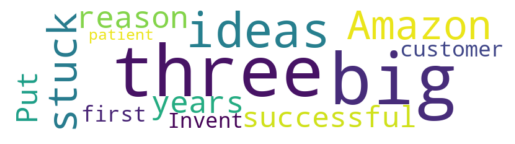

In [ ]:
quote = "We've had three big ideas at Amazon that we've stuck with for 18 years, and they're the reason we're successful: Put the customer first. Invent. And be patient."

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800,
                      height=200,
                      #max_words=100,
                      background_color='white').generate(quote)
# Display the generated image with matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# And a Term Freq Way

{'if': 1, 'you': 1, 'do': 1, 'build': 2, 'a': 4, 'great': 2, 'experience': 2, 'customers': 2, 'tell': 1, 'each': 1, 'other': 1, 'about': 1, 'that': 1, 'word': 1, 'of': 2, 'mouth': 1, 'is': 1, 'very': 1, 'powerful': 1, 'we': 3, 'see': 1, 'our': 3, 'as': 1, 'invited': 1, 'guests': 1, 'to': 3, 'party': 1, 'and': 1, 'are': 2, 'the': 3, 'hosts': 1, 'it': 1, 's': 2, 'job': 1, 'every': 2, 'day': 1, 'make': 1, 'important': 1, 'aspect': 1, 'customer': 1, 'little': 1, 'bit': 1, 'better': 1, 'in': 1, 'end': 1, 'choices': 1, 'yourself': 1, 'story': 1, 'life': 1, 'too': 1, 'short': 1, 'hang': 1, 'out': 1, 'with': 1, 'people': 1, 'who': 1, 'aren': 1, 't': 1, 'resourceful': 1}


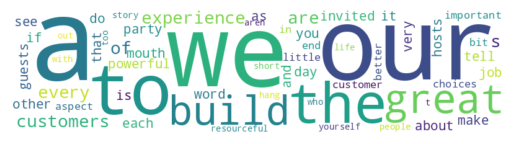

In [ ]:
from collections import Counter
import re

# some favorite Bezos quotes
text = """
If you do build a great experience, customers tell each other about that. Word of mouth is very powerful.
We see our customers as invited guests to a party, and we are the hosts. It's our job every day to make every important aspect of the customer experience a little bit better.
In the end, we are our choices. Build yourself a great story.
Life's too short to hang out with people who aren't resourceful.
"""

# Convert the text to lower case and split it into words
words = re.findall(r'\b\w+\b', text.lower())

# Count the frequency of each word
word_freq = Counter(words)

# Print the dictionary
print(dict(word_freq))


# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800,
                      height=200,
                      #max_words=100,
                      background_color='white').fit_words(dict(word_freq))
# Display the generated image with matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text = "Programing Python is a lot of Fun!"

print(text.split(" ")[1])

Python


# Download punkit and stopwords


---

- punkt  provides pre-trained tokenizers for natural language processing. Specifically, it provides several tokenizers for sentence and word segmentation in different languages, including English. These tokenizers can be used to break up raw text into meaningful units that can be further processed, such as words or sentences.

- stopwords provides a list of **common words** that are typically removed from text during preprocessing. Examples of stop words include "the", "and", "of", "a", "in", and "to". This can help to reduce the noise and improve the accuracy of natural language processing tasks.

In [ ]:
# dlownload nltk datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import Twitter Dataset


---

Matt Taibbi is an American author, journalist, and political commentator known for his sharp wit and incisive writing on a wide range of topics. Taibbi has written extensively on politics, finance, and the media, and previously was best known for his coverage of the 2008 financial crisis and the subsequent government bailout of the banking industry. Today however Matt and friends are at the center of the "Twitter Files" disclosures.

The Twitter Files are a series of releases of select internal Twitter, Inc. documents that were made public, starting in December 2022, by CEO Elon Musk, who gave them to journalists Matt Taibbi, Bari Weiss, Lee Fang, and authors Michael Shellenberger, David Zweig and Alex Berenson shortly after Musk acquired Twitter.

They show Twitter executives, employees and their interactions with various factions of the US goverment grappling with difficult decisoins, questioning the company's rules and how they should be applied — and in some cases, getting things wrong.

Here I scraped about 3k tweets around Matt Taibbi's interactions on Twitter as of 1APR2023.

In [ ]:
tweets = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_9/data/mtaibbi_tweets_4_1_2023.csv",
                     parse_dates=["created_at"])[["created_at","id_str","full_text","retweet_count","favorite_count"]]

tweets['tweet_date'] = tweets['created_at'].dt.date
tweets.head(10)

,created_at,id_str,full_text,retweet_count,favorite_count,tweet_date
0,2023-04-01 01:49:14+00:00,1641981012954546177,@ElonSantosLuna @qgk6gn48nb Like you? You’re o...,3,75,2023-04-01
1,2023-04-01 01:30:13+00:00,1641976226872000516,"Impressively, Kirschner gets through that whol...",259,2006,2023-04-01
2,2023-04-01 01:24:10+00:00,1641974702754131969,“Less dumber”? https://t.co/UcjdvIGRJl,368,5639,2023-04-01
3,2023-04-01 00:35:46+00:00,1641962523841777664,"Episode 32: ""America This Week,"" with @WalterK...",293,1511,2023-04-01
4,2023-04-01 00:21:14+00:00,1641958865267826688,And he was wrong and an asshole to do it. His ...,412,4389,2023-04-01
5,2023-04-01 00:11:14+00:00,1641956350266572800,@qgk6gn48nb Proven guilt? Not yet. What are yo...,9,362,2023-04-01
6,2023-03-31 23:17:54+00:00,1641942928934203395,Maybe because they didn’t give out Pulitzer Pr...,209,2105,2023-03-31
7,2023-03-31 23:15:55+00:00,1641942428776013825,@LIngenieurNoir I don’t think Cohen should hav...,3,57,2023-03-31
8,2023-03-31 23:11:47+00:00,1641941387212931073,@bdhaupt A grand jury’s true bill isn’t a pron...,26,408,2023-03-31
9,2023-03-31 23:06:00+00:00,1641939932758278146,The “prove innocence” wording by @SpeakerPelos...,1418,7293,2023-03-31


# Stopwords
---


Stopwords are commonly occurring words in natural language that carry **little meaning** on their own and are typically removed from text during preprocessing. Examples of stopwords in English include "the", "and", "of", "a", "in", and "to".


In [ ]:
# Define the stop words to remove
stop_words = set(stopwords.words('english'))

# Convert the set to a DataFrame
stopwords_df = pd.DataFrame(list(stop_words), columns=['stopword'])
print("There are {} words in the stopword list here is a sample: \n {}".format(stopwords_df.shape[0],list(stop_words)[0:4]))



There are 179 words in the stopword list here is a sample: 
 ['ours', 'and', 'while', 'into']


# Excludes
---

Like stopwords, excludes are commonly occuring no to low value words that you need to remove based on the TEXT you are analyzing.


In [ ]:
exclude_words = ["t.co", "https", "rt","iphone", "amp", "android", "it's", " ", "_", "-"]

exclude_df = pd.DataFrame(list(exclude_words), columns=['stopword'])
exclude_df

,stopword
0,t.co
1,https
2,rt
3,iphone
4,amp
5,android
6,it's
7,
8,_
9,-


# Prepare & Explode


In [ ]:
term_df = (tweets['full_text']
             .str.lower()
             .str.strip() # remove leading and trailing spaces
             .str.normalize('NFKD') # string encodings
             .str.split() # make a list of text
             .explode() # create rows of words
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .reset_index(drop=True)
             .to_frame('term')
          )
term_df.head(10)

,term
0,elonsantosluna
1,qgk6gn48nb
2,like
3,you
4,you’re
5,one
6,of
7,the
8,smart
9,people


# Term Freq. with Junk!


---



In [ ]:
term_freq_w_junk = (term_df
            .groupby("term")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
term_freq_w_junk

,term,freq
0,the,3775
1,to,2112
2,a,1861
3,of,1745
4,and,1450
...,...,...
14424,httpstcokbhsfao6tj,1
14425,httpstcokbiq8ijg4f,1
14426,httpstcokbn0rvmsbg,1
14427,httpstcokbn8y5p2ld,1


# Visualize with Junk!


---



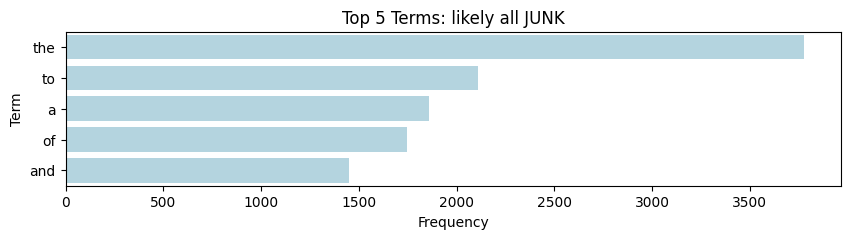

In [ ]:

# Create bar plot of top 5 terms
plt.figure(figsize=(10, 2))
sns.barplot(x="freq", y="term", data=term_freq_w_junk.head(5), color="lightblue")
plt.title('Top 5 Terms: likely all JUNK')
plt.xlabel('Frequency')
plt.ylabel('Term');

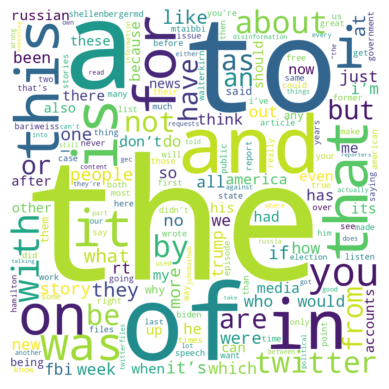

In [ ]:
# Create a dictionary of terms and frequencies
term_freq_w_junk_dict = dict(zip(term_freq_w_junk['term'], term_freq_w_junk['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq_w_junk_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Remove Stopwords & Excludes

In [ ]:
# concatenate to one dataframe
excludes_stopwords = pd.concat([stopwords_df,exclude_df],axis=0)

# normalize the strings in the term_freq_w_junk dataframe
excludes_stopwords['stopword'] = excludes_stopwords['stopword'].str.normalize('NFKD')
excludes_stopwords['stopword'] = excludes_stopwords['stopword'].str.strip()

# Remove stop words and excludes from the DataFrame
term_freq_wo_junk = (term_freq_w_junk
             .merge(excludes_stopwords, how='left', left_on='term', right_on='stopword')
             .query("stopword.isna()")
             .drop(['stopword'], axis=1)
            )

term_freq_wo_junk

,term,freq
18,twitter,427
29,like,298
33,one,253
34,people,249
37,it’s,227
...,...,...
14424,httpstcokbhsfao6tj,1
14425,httpstcokbiq8ijg4f,1
14426,httpstcokbn0rvmsbg,1
14427,httpstcokbn8y5p2ld,1


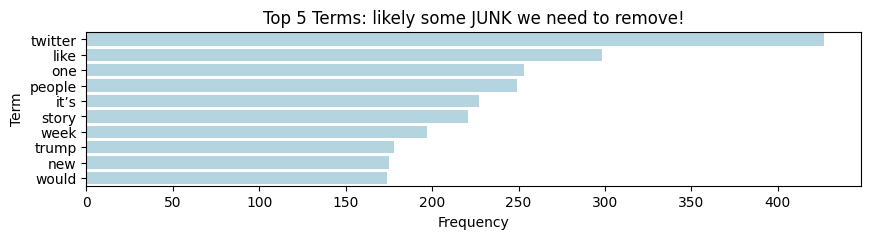

In [ ]:
# Create bar plot of top 5 terms
plt.figure(figsize=(10, 2))
sns.barplot(x="freq", y="term", data=term_freq_wo_junk.head(10), color="lightblue")
plt.title('Top 5 Terms: likely some JUNK we need to remove!')
plt.xlabel('Frequency')
plt.ylabel('Term');

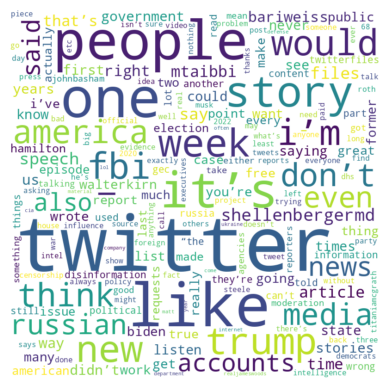

In [ ]:
# Create a dictionary of terms and frequencies
term_freq_wo_junk_dict = dict(zip(term_freq_wo_junk['term'], term_freq_w_junk['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq_wo_junk_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Bigram


---

Bigrams are used to capture the relationships between adjacent words or characters in a sequence. Ever wonder how those type-ahead things work? they are fancy n-gram models which predict the next word in a sequence, bigrams and n-grams are the foundation of how these models work.

> A bigram is a pair of consecutive words in a text. For example, in the sentence "I love ice cream," the bigrams are (I, love), (love, ice), and (ice, cream). Bigrams provide a simple way to capture some of the context and dependencies between words, identifing common phrases or collocations, i.e., groups of words that frequently occur together.

An n-gram is a more generalized concept, representing a contiguous **sequence** of n items from a given text or speech. The items can be characters,  words, or even phrases, depending on the context.

The block below is the "textbook" way to craft bigrams with functions the challenge is that it requires additional work to make them usefull.

Take a look at the code after this block!

                                             bigrams  \
0  [(, elonsantosluna), (elonsantosluna, ), (, qg...   
1  [(impressively, ), (, kirschner), (kirschner, ...   
2  [(“, less), (less, dumber), (dumber, ”), (”, )...   
3  [(episode, 32), (32, ), (, ), (, america), (am...   
4  [(wrong, asshole), (asshole, ), (, doj), (doj,...   

                                           full_text  
0  @ElonSantosLuna @qgk6gn48nb Like you? You’re o...  
1  Impressively, Kirschner gets through that whol...  
2             “Less dumber”? https://t.co/UcjdvIGRJl  
3  Episode 32: "America This Week," with @WalterK...  
4  And he was wrong and an asshole to do it. His ...  


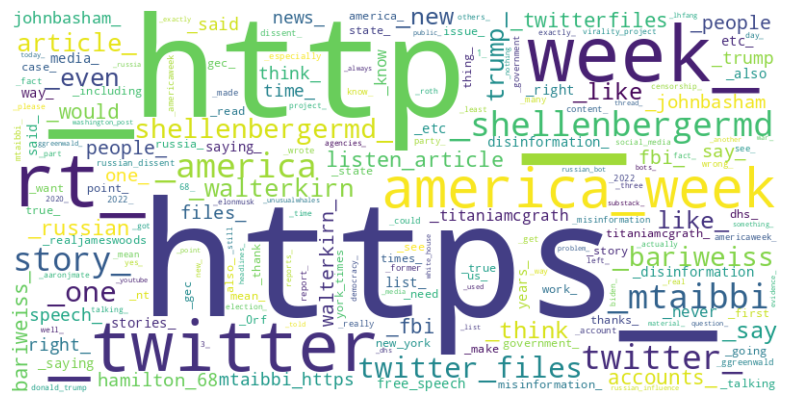

In [ ]:
from itertools import chain
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [token.translate(table) for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

# Generate bigrams
def generate_bigrams(text):
    tokens = preprocess_text(text)
    return list(bigrams(tokens))

# Apply the bigrams function to the DataFrame
tweets['bigrams'] = tweets['full_text'].apply(generate_bigrams)

print(tweets[["bigrams", "full_text"]].head())

# Extract bigrams from the DataFrame
all_bigrams = list(chain(*tweets['bigrams']))

# Convert bigrams to strings and join them with an underscore
bigram_strings = ['_'.join(bigram) for bigram in all_bigrams]

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(' '.join(bigram_strings))

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# My prefered way...


---

My way explodes the bigrams into rows of a table which can easily be counted up and prepared.

In [ ]:
ngram_size = 2

# Extract bi-grams from the "full_text" column
bigram_df = (tweets['full_text']
             .str.lower()
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .str.split()
             .apply(lambda x: list(ngrams(x, ngram_size))) # Extract bi-grams
             .explode()
             .reset_index(drop=True)
             .to_frame('bigram')
          )


# Count the bigrams
bigram_freq = (bigram_df.groupby("bigram")
                     .agg(freq=("bigram", "count"))
                     .reset_index()
                     .sort_values("freq", ascending=False)
                     #.rename(columns={"big": "term"})
                     .dropna()
                     .reset_index(drop=True)
            )
# eyeball them
bigram_freq.head(10)

,bigram,freq
0,"(of, the)",310
1,"(in, the)",236
2,"(this, week)",162
3,"(on, the)",161
4,"(to, the)",145
5,"(america, this)",120
6,"(to, be)",113
7,"(the, fbi)",106
8,"(about, the)",104
9,"(this, is)",100


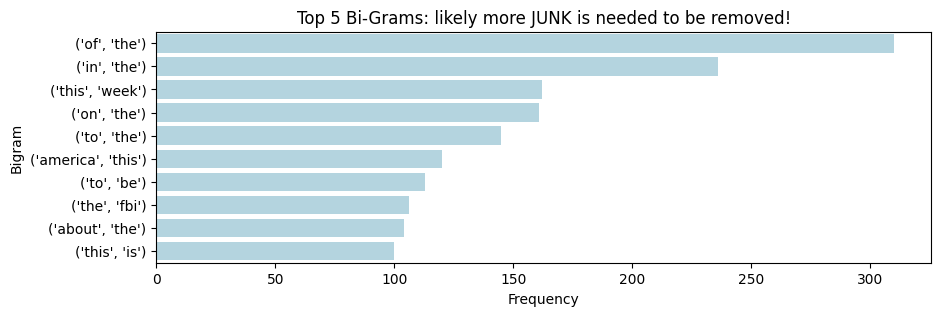

In [ ]:
# Create bar plot of top 5 terms
plt.figure(figsize=(10, 3))
sns.barplot(x="freq", y="bigram", data=bigram_freq.head(10), color="lightblue")
plt.title('Top 5 Bi-Grams: likely more JUNK is needed to be removed!')
plt.xlabel('Frequency')
plt.ylabel('Bigram');

In [ ]:
# get a list of stop words
stop_words = set(stopwords.words('english'))
# remove any nulls
bigram_freq = bigram_freq.dropna()

# create a new column with stop words removed
bigram_freq['bigram_wo_stopwords'] = bigram_freq['bigram'].apply(lambda x: ' '.join([word for word in x if pd.notna(word) and word.lower() not in stop_words]))

# select only bigrams that contain two words
bigram_freq = bigram_freq[bigram_freq['bigram_wo_stopwords'].str.split().str.len() == 2].reset_index(drop=True)
bigram_freq.head(10)

,bigram,freq,bigram_wo_stopwords
0,"(twitter, files)",86,twitter files
1,"(shellenbergermd, bariweiss)",68,shellenbergermd bariweiss
2,"(bariweiss, johnbasham)",47,bariweiss johnbasham
3,"(hamilton, 68)",42,hamilton 68
4,"(johnbasham, titaniamcgrath)",41,johnbasham titaniamcgrath
5,"(titaniamcgrath, realjameswoods)",33,titaniamcgrath realjameswoods
6,"(free, speech)",32,free speech
7,"(new, york)",31,new york
8,"(york, times)",25,york times
9,"(rt, americaweek)",25,rt americaweek


# Who / What is Hamilton 68?

Leaked emails, have cast doubt on the credibility of a prominent database used to monitor online influence campaigns by Russia. The emails, allegedly exchanged among Twitter executives, were published by journalist Matt Taibbi as part of an ongoing series called "Twitter Files" that showcases the social media platform's internal content moderation discussions.

The series included a Twitter thread containing photos of emails that revealed a former executive, Yoel Roth, had expressed reservations about the reliability of **Hamilton 68**, *a public dashboard that tracked the activity of hundreds of Twitter accounts to trace the spread of pro-Russian propaganda on the internet*. Hamilton 68 has since been discontinued..

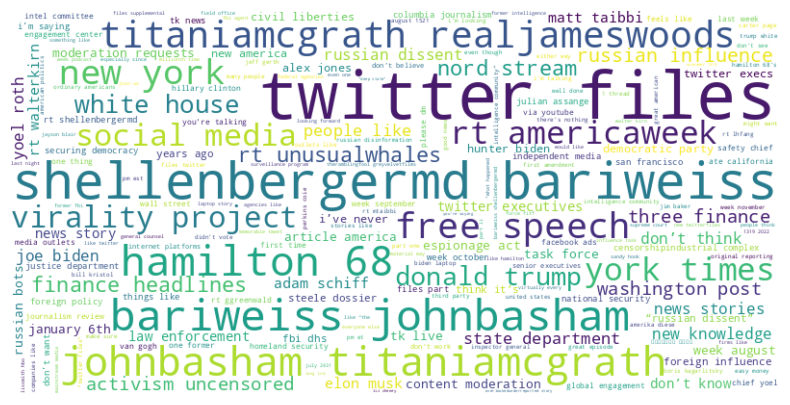

In [ ]:

# assume that 'bigram_freq' is a DataFrame containing bigrams and their frequencies
bigram_freq['freq'] = pd.to_numeric(bigram_freq['freq'])

# Create a dictionary of terms and frequencies
bigram_dict = dict(zip(bigram_freq['bigram_wo_stopwords'], bigram_freq['freq']))


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

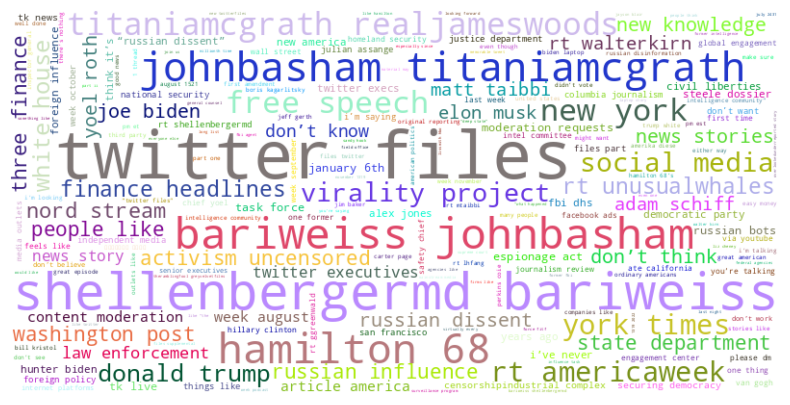

In [ ]:
import numpy as np
# Define a function to generate random colors
def random_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(np.random.randint(0, 255, 3))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=random_color).generate_from_frequencies(bigram_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
quote = ["We've had three big ideas at Amazon that we've stuck with for 18 years, and they're the reason we're successful: Put the customer first. Invent. And be patient."]
bezos = pd.DataFrame(quote,columns=['quote'])

# Extract bi-grams from the "full_text" column and count their frequency
bezos_freq = (bezos['quote']
             .str.lower()
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .str.split()
             .explode()
             .reset_index(drop=True)
             .to_frame('terms')
             .groupby("terms")
             .agg(freq=("terms", "count"))
             .reset_index()
             .sort_values("freq", ascending=False)
             .reset_index(drop=True)
          )

bezos_freq

,terms,freq
0,and,2
1,weve,2
2,the,2
3,18,1
4,put,1
5,with,1
6,were,1
7,three,1
8,theyre,1
9,that,1


In [ ]:
# --
bezos_terms = (bezos['quote']
             .str.lower()
             #.str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .str.split()
             .explode()
             .reset_index(drop=True)
             .to_frame("term"))

bezos_terms

,term
0,we've
1,had
2,three
3,big
4,ideas
5,at
6,amazon
7,that
8,we've
9,stuck


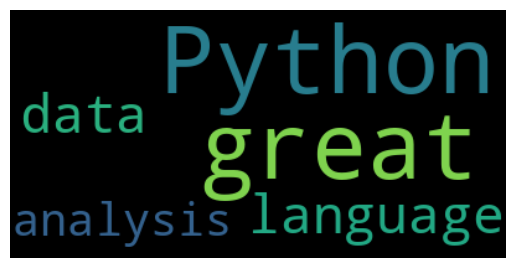

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Suppose you have the following text
text = "Python is a great language for data analysis"

# Create a WordCloud object
wordcloud = WordCloud().generate(text)

# Display the generated image with matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

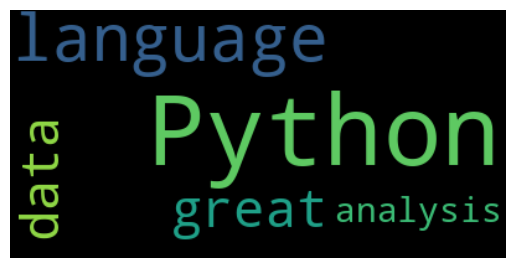

In [ ]:
frequencies = {'Python':5, 'great':3, 'language':5, 'data':3, 'analysis':1}
wordcloud = WordCloud().fit_words(frequencies)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
stopwords.words('french')


['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [ ]:
stopwords.words('german')

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '